<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Wan_adaptive_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this code we are going to explore about adaptive thresholding. Adaptive thresholding, which considers small neighbors of pixels and then ﬁnds an optimal threshold value T for each neighbor.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the package that we will use for the code.

In [2]:
# Import the necessary packages
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [3]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/coins.png"
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

On line 3, we convert the image into grayscale and apply gaussian blur on line 4.

Then, displaying the actual image on our screen. The parameter is a reference to the image we convert before.

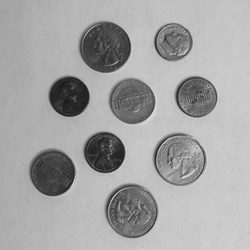

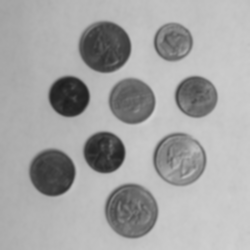

In [4]:
# Task 2
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)



cv2_imshow(blurred)

We then apply adaptive thresholding to our blurred image using the cv2.adaptiveThreshold function on Line 1. The ﬁrst parameter we supply is the image we want to threshold. Then, we supply our maximum value of 255, similar to simple thresholding mentioned above.

The third argument is our method to compute the threshold for the current neighborhood of pixels. By supplying cv2.ADAPTIVE_THRESH_MEAN_C, we indicate that we want to compute the mean of the neighborhood of pixels and treat it as our T value.

Next, we need our thresholding method. Again, the description of this parameter is identical to the simple thresholding method mentioned above. We use cv2.THRESH_BINARY_INV to indicate that any pixel intensity greater than T in the neighborhood should be set to 255, otherwise it should be set to 0.

The next parameter is our neighborhood size. This integer value must be odd and indicates how large our neighborhood of pixels is going to be. We supply a value of 11, indicating that we are going to examine 11 x 11 pixel regions of the image, instead of trying to threshold the image globally, as in simple thresholding methods.

Finally, we supply a parameter simply called C. This value is an integer that is subtracted from the mean, allowing us to ﬁne-tune our thresholding. We use C = 4 in this example.

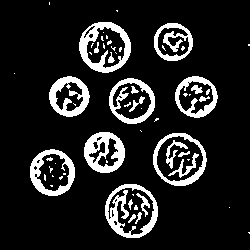

In [5]:
# Task 5
# Show image thresh here with adaptive threshold
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
cv2_imshow(thresh)

Besides applying standard mean thresholding, we can also apply Gaussian (weighted mean) thresholding, as we do on Line 2.

Instead of supplying a value of cv2.ADAPTIVE_THRESH_ MEAN_C, we instead use cv2.ADAPTIVE_THRESH_GAUSSIAN_C to indicate we want to use the weighted mean. We are also using a 15 x 15 pixel neighborhood size rather than an 11 x 11 neighborhood size as in the previous example. We also alter our C value (the value we subtract from the mean) slightly and use 3 rather than 4.

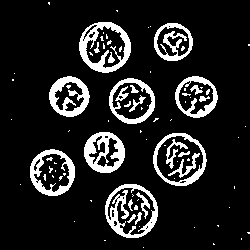

In [6]:
# We can also apply Gaussian thresholding in the same manner
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

# Task 6
# Show image thresh here :
cv2_imshow(thresh)